# Customer Segmentation 

- The dataset has 3 hidden clusters, each representing a distinct customer segment: 
1. Bargain Hunters 
2. High Spenders 
3. Window Shoppers

> Goal: Identify and clearly visualize these cluster separations. 

## Environment Setup

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_style("darkgrid")
sns.set_palette(sns.husl_palette(h=.5))

## EDA

In [3]:
customer_data = pd.read_csv("customer_behavior_analytcis.csv")

In [4]:
customer_data.shape

(999, 6)

In [5]:
customer_data.head()

,total_purchases,avg_cart_value,total_time_spent,product_click,discount_counts,customer_id
0,7.0,129.34,52.17,18.0,0.0,CM00000
1,22.0,24.18,9.19,15.0,7.0,CM00001
2,2.0,32.18,90.69,50.0,2.0,CM00002
3,25.0,26.85,11.22,16.0,10.0,CM00003
4,7.0,125.45,34.19,30.0,3.0,CM00004


In [6]:
customer_data.isna().sum()

total_purchases     20
avg_cart_value      20
total_time_spent     0
product_click       20
discount_counts      0
customer_id          0
dtype: int64

In [7]:
customer_data.isna().any(axis=1).sum()

20

Missing Row Percentage = 20/999 ~= 2%
We can drop these missing rows without affecting the quality of the analysis, considering the followinf reasons
- The missing row percentage is very low, w.r.t to the dataset size (<5%)
- Our goal is to identify cluster seperations for different customer behaviour groups
- Imputatiion methods can be introduce errors to the dataset since these rows contain missing values three significant attributes

In [8]:
# Missing Row Percentage = 20/999 ~= 2%
# We can drop these missing rows without affecting the quality of the analysis, considering the followinf reasons
#       - The missing row percentage is very low, w.r.t to the dataset size (<5%)
#       - Our goal is to identify cluster seperations for different customer behaviour groups
#       - Imputatiion methods can be introduce errors to the dataset since these rows contain
# missing values three significant attributes

customer_data = customer_data.dropna()

### Feature Value Distributions

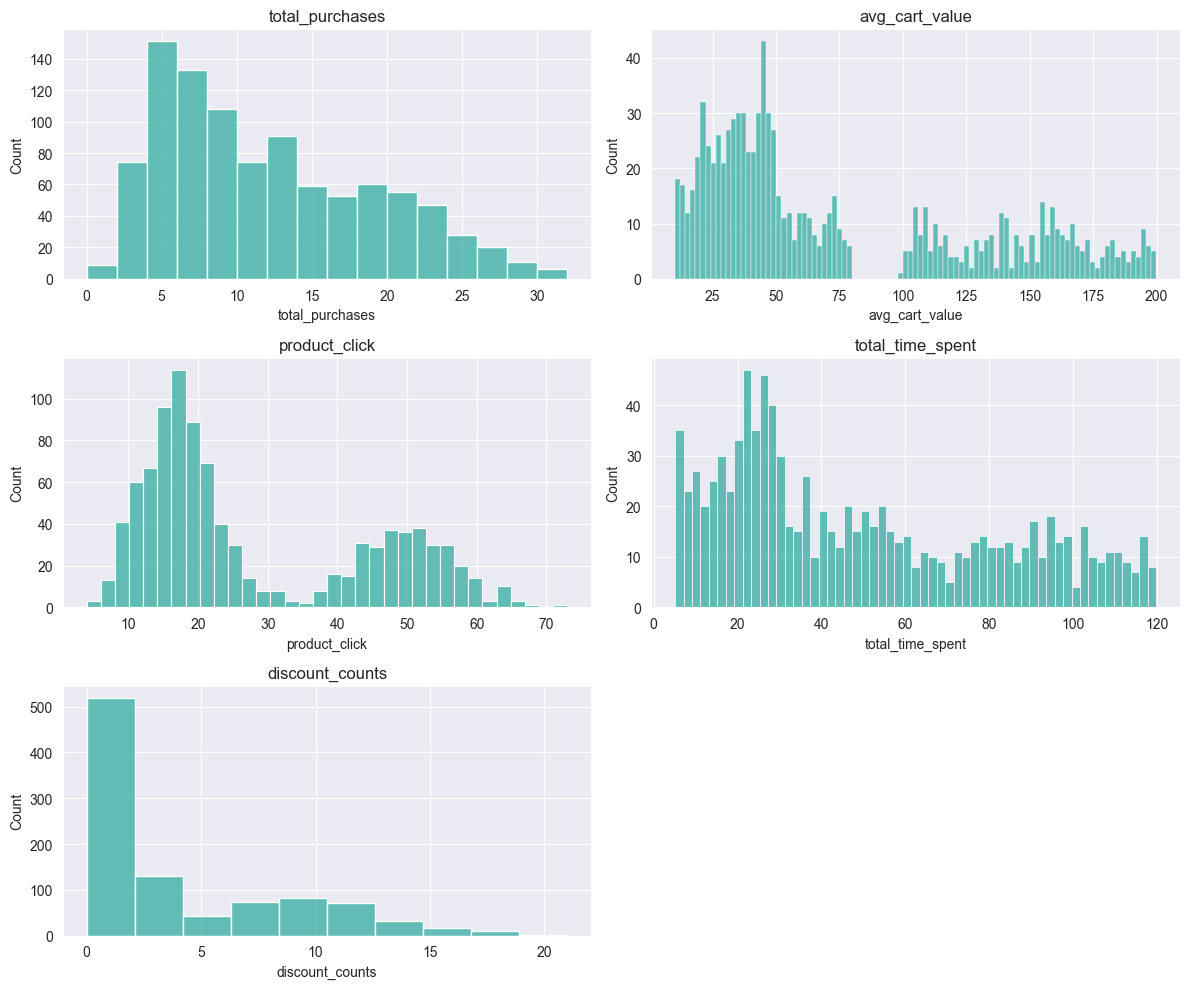

In [9]:
features_of_interest = ["total_purchases","avg_cart_value","product_click","total_time_spent","discount_counts"]

fig, axes = plt.subplots(3,2, figsize=(12,10))
axes = axes.flatten()
for i in range(len(features_of_interest)):
    sns.histplot(customer_data[features_of_interest[i]],ax=axes[i],binwidth=2)
    axes[i].set_title(features_of_interest[i])
axes[5].axis('off')
plt.tight_layout()
plt.show()

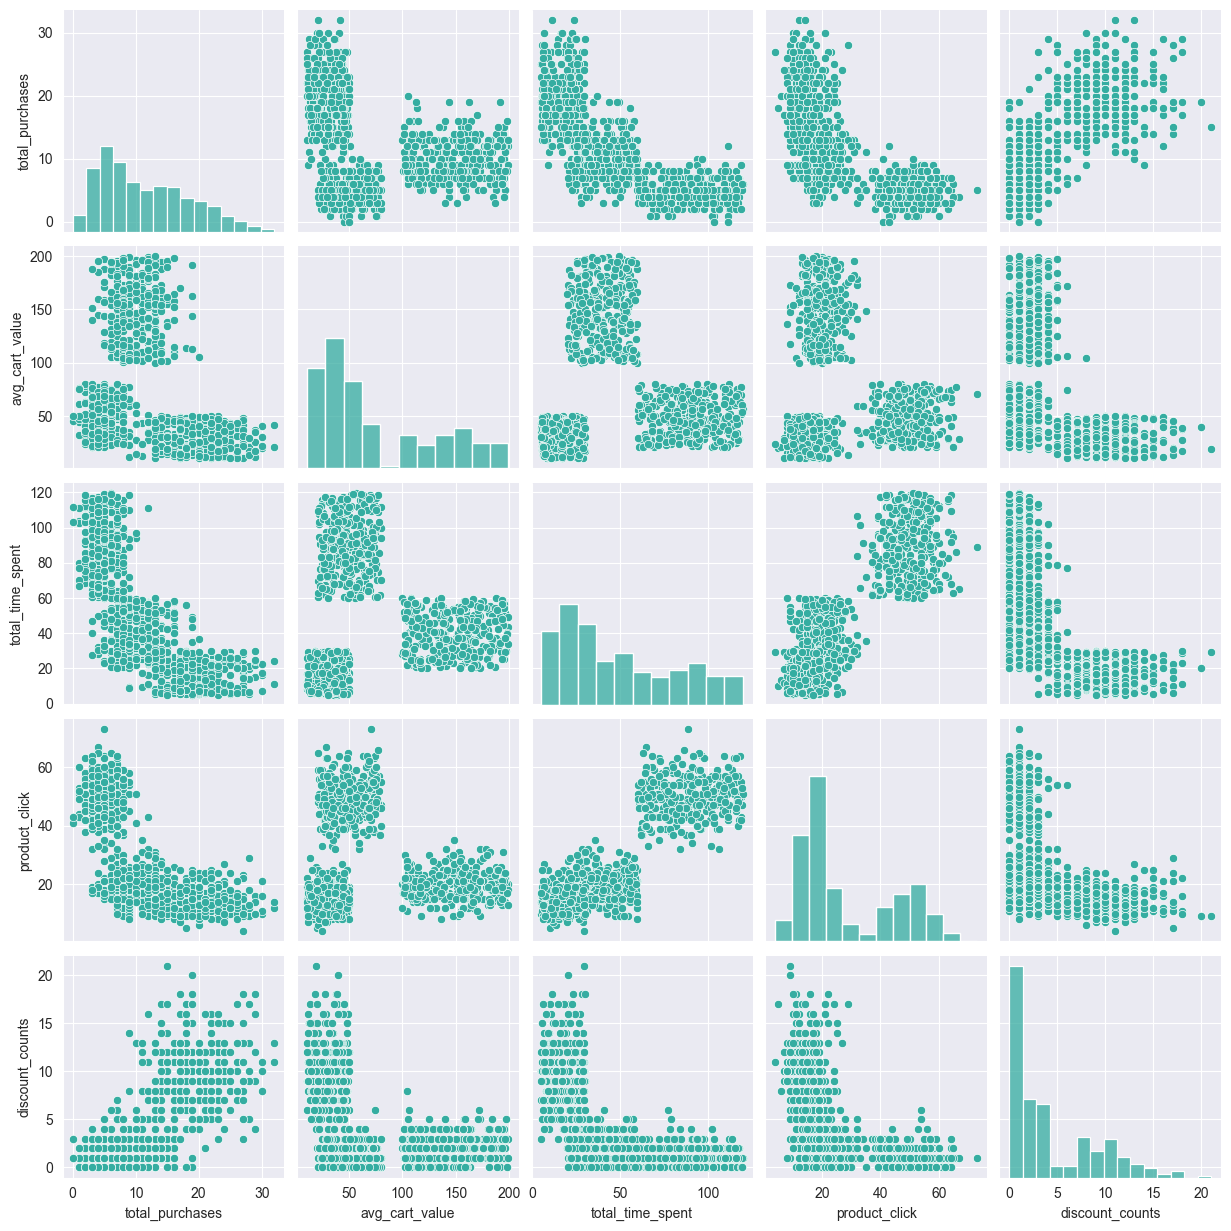

In [10]:
sns.pairplot(data=customer_data[:-1])

##### Insights

- Pair plots provide a clear understanding of customer distribution and confirm the presence of three distinct customer groups.

<Axes: xlabel='avg_cart_value', ylabel='total_time_spent'>

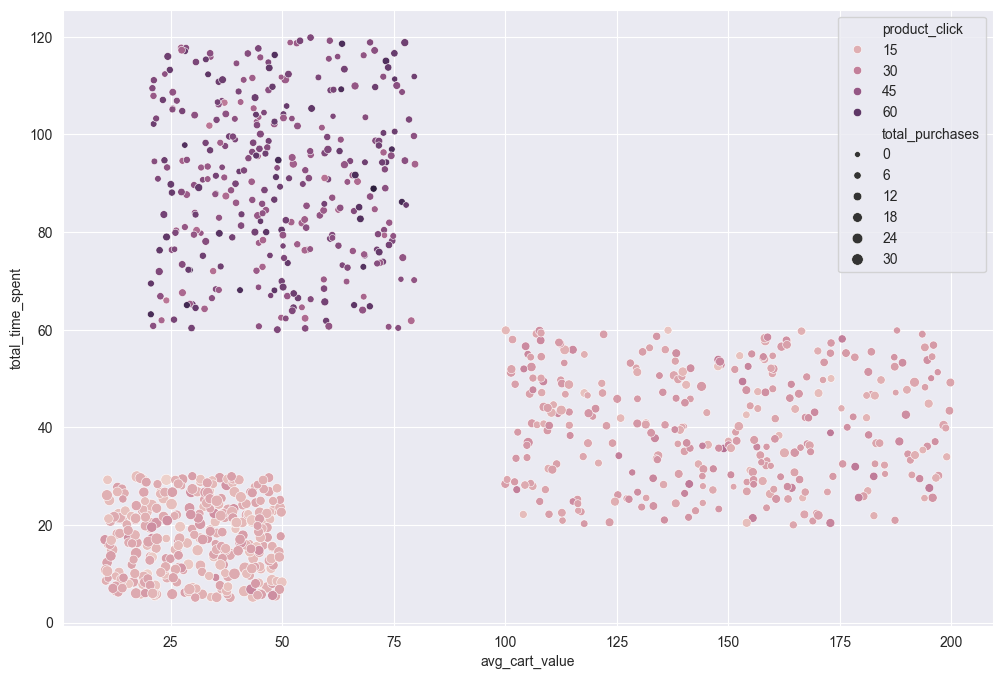

In [11]:
plt.figure(figsize=(12,8))
sns.scatterplot(data = customer_data, x = "avg_cart_value", y = "total_time_spent", size = "total_purchases" , hue="product_click")

#### Visualization - avg_cart_value vs total_time_spent vs total_purchases

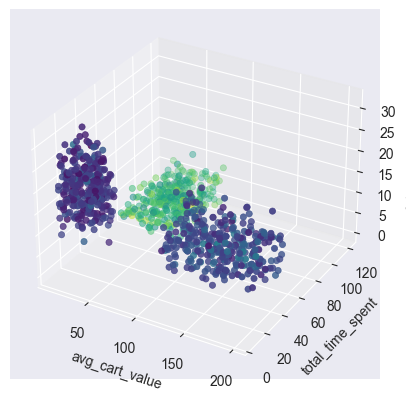

In [12]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(customer_data["avg_cart_value"], customer_data["total_time_spent"], customer_data["total_purchases"],c=customer_data["product_click"], cmap='viridis', linewidth=0.5)
ax.set_xlabel('avg_cart_value')
ax.set_ylabel('total_time_spent')
ax.set_zlabel('total_purchases')
plt.show()

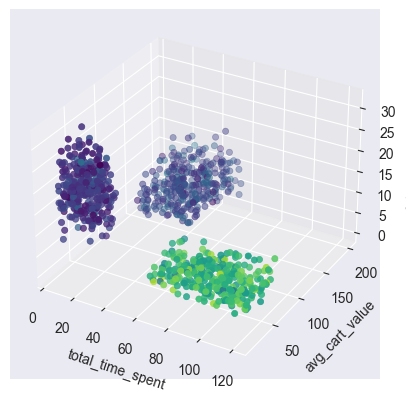

In [13]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(customer_data["total_time_spent"],customer_data["avg_cart_value"], customer_data["total_purchases"],c=customer_data["product_click"], cmap='viridis', linewidth=0.5)
ax.set_xlabel('total_time_spent')
ax.set_ylabel('avg_cart_value')
ax.set_zlabel('total_purchases')
plt.show()

## Clustering

- 2 clustering methods have been experimented in this seciton
    - KMeans
    - DBSCAN

### KMeans

In [14]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [15]:
scaler = MinMaxScaler()

In [16]:
customer_data_without_id = customer_data.loc[:, customer_data.columns != "customer_id"]

In [17]:
customer_data_without_id_scaled = scaler.fit_transform(customer_data_without_id)

In [18]:
kmeans = KMeans(n_clusters=3,n_init="auto")

In [19]:
kmeans_clustering = kmeans.fit(customer_data_without_id_scaled)

In [20]:
customer_data["kmeans_labels"] = kmeans_clustering.labels_

In [21]:
customer_data["kmeans_labels"].value_counts()

kmeans_labels
0    328
1    326
2    325
Name: count, dtype: int64

### DBSCAN

In [22]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler

In [23]:
scaler = MinMaxScaler()
customer_data_without_id_scaled = scaler.fit_transform(customer_data_without_id)

In [24]:
dbscan = DBSCAN(eps=0.2, min_samples=7)
dbscan_clustering = dbscan.fit(customer_data_without_id_scaled)

In [25]:
customer_data["dbscan_labels"] = dbscan_clustering.labels_

In [26]:
customer_data.head()

,total_purchases,avg_cart_value,total_time_spent,product_click,discount_counts,customer_id,kmeans_labels,dbscan_labels
0,7.0,129.34,52.17,18.0,0.0,CM00000,2,0
1,22.0,24.18,9.19,15.0,7.0,CM00001,1,1
2,2.0,32.18,90.69,50.0,2.0,CM00002,0,2
3,25.0,26.85,11.22,16.0,10.0,CM00003,1,1
4,7.0,125.45,34.19,30.0,3.0,CM00004,2,0


In [27]:
customer_data["dbscan_labels"].value_counts()

dbscan_labels
2    328
1    326
0    325
Name: count, dtype: int64

## KMeans Clustering Evaluation

In [28]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
import dbcv

In [29]:
kmeans_si = silhouette_score(customer_data_without_id,customer_data["kmeans_labels"])
kmeans_dbi = davies_bouldin_score(customer_data_without_id,customer_data["kmeans_labels"])
kmeans_dbcv = dbcv.dbcv(customer_data_without_id,customer_data["kmeans_labels"])

In [30]:
print("Silhouette Score: ",kmeans_si)
print("Davies Bouldin Score: ",kmeans_dbi)
print("DBCV: ",kmeans_dbcv)

Silhouette Score:  0.6782443531784228
Davies Bouldin Score:  0.4474544605980218
DBCV:  0.911665808548044


## DBSCAN CLustering Evaluation

In [31]:
dbscan_si = silhouette_score(customer_data_without_id,customer_data["dbscan_labels"])
dbscan_dbi = davies_bouldin_score(customer_data_without_id,customer_data["dbscan_labels"])
dbscan_dbcv = dbcv.dbcv(customer_data_without_id,customer_data["dbscan_labels"])

In [32]:
print("Silhouette Score: ",dbscan_si)
print("Davies Bouldin Score: ",dbscan_dbi)
print("DBCV: ",dbscan_dbcv)

Silhouette Score:  0.6782443531784228
Davies Bouldin Score:  0.4474544605980218
DBCV:  0.911665808548044


## Cluster Visualization - Qualitative Evaluation

In [33]:
customer_data_with_labels = customer_data.loc[:, customer_data.columns != "dbscan_labels"]

### Pairplots with KMeans Labels

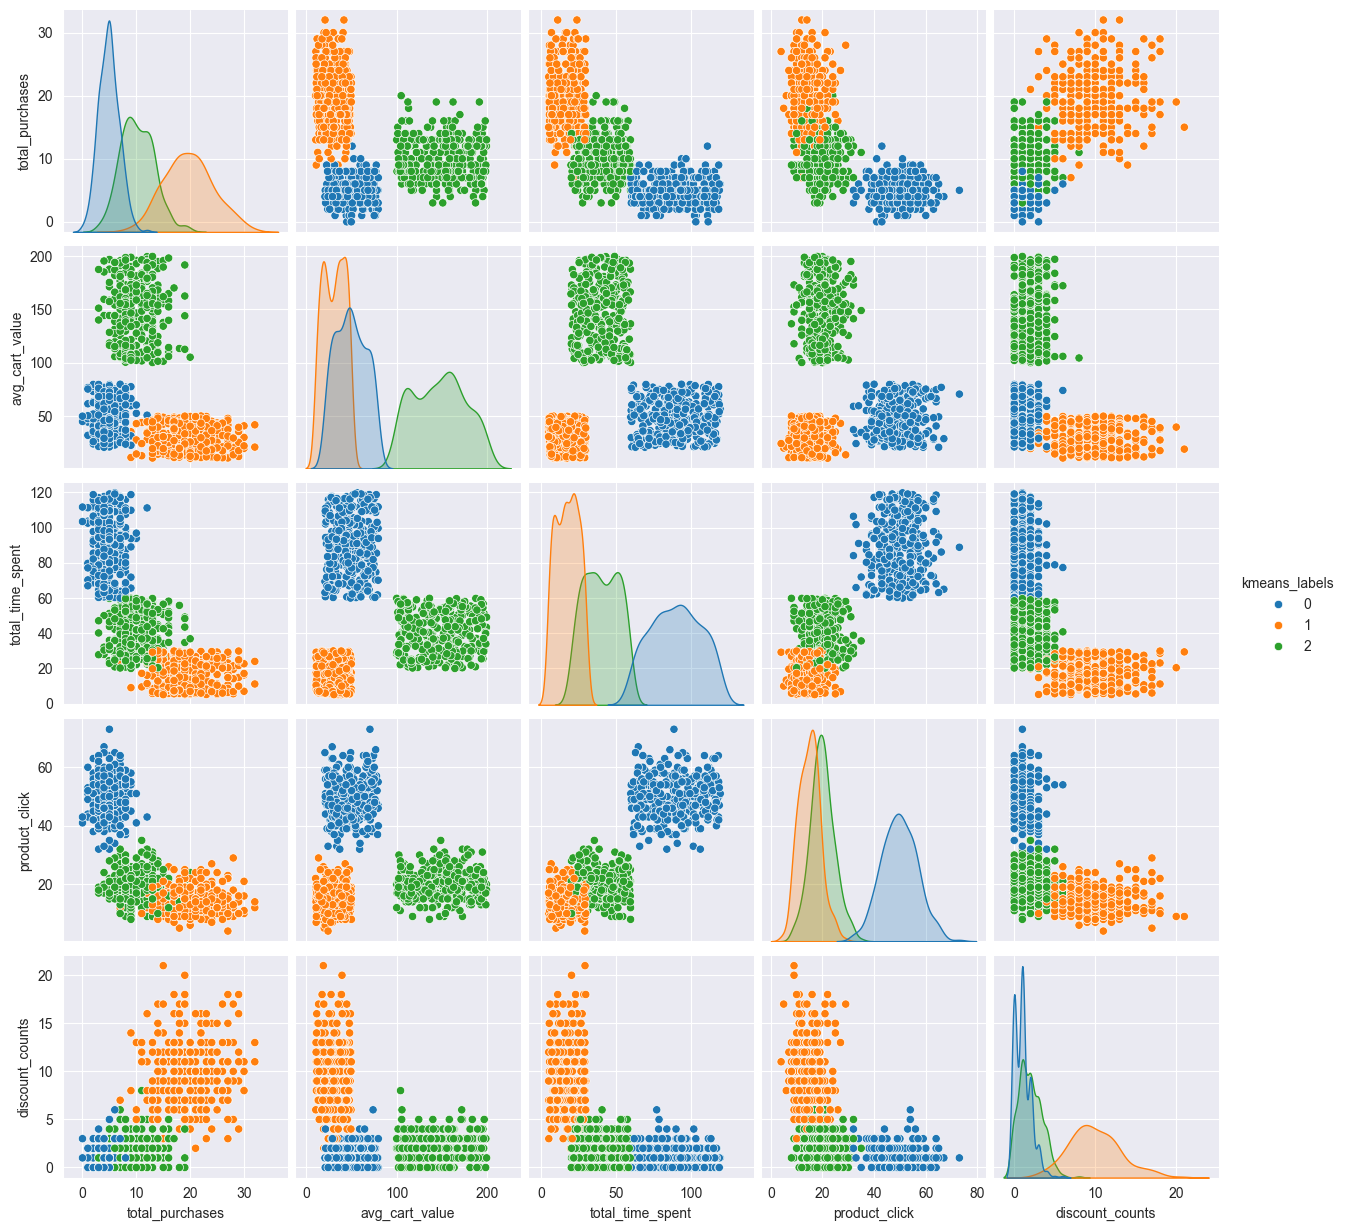

In [34]:
sns.pairplot(customer_data_with_labels,hue="kmeans_labels",palette="tab10")

### Pair Plots with DBSCAN Labels

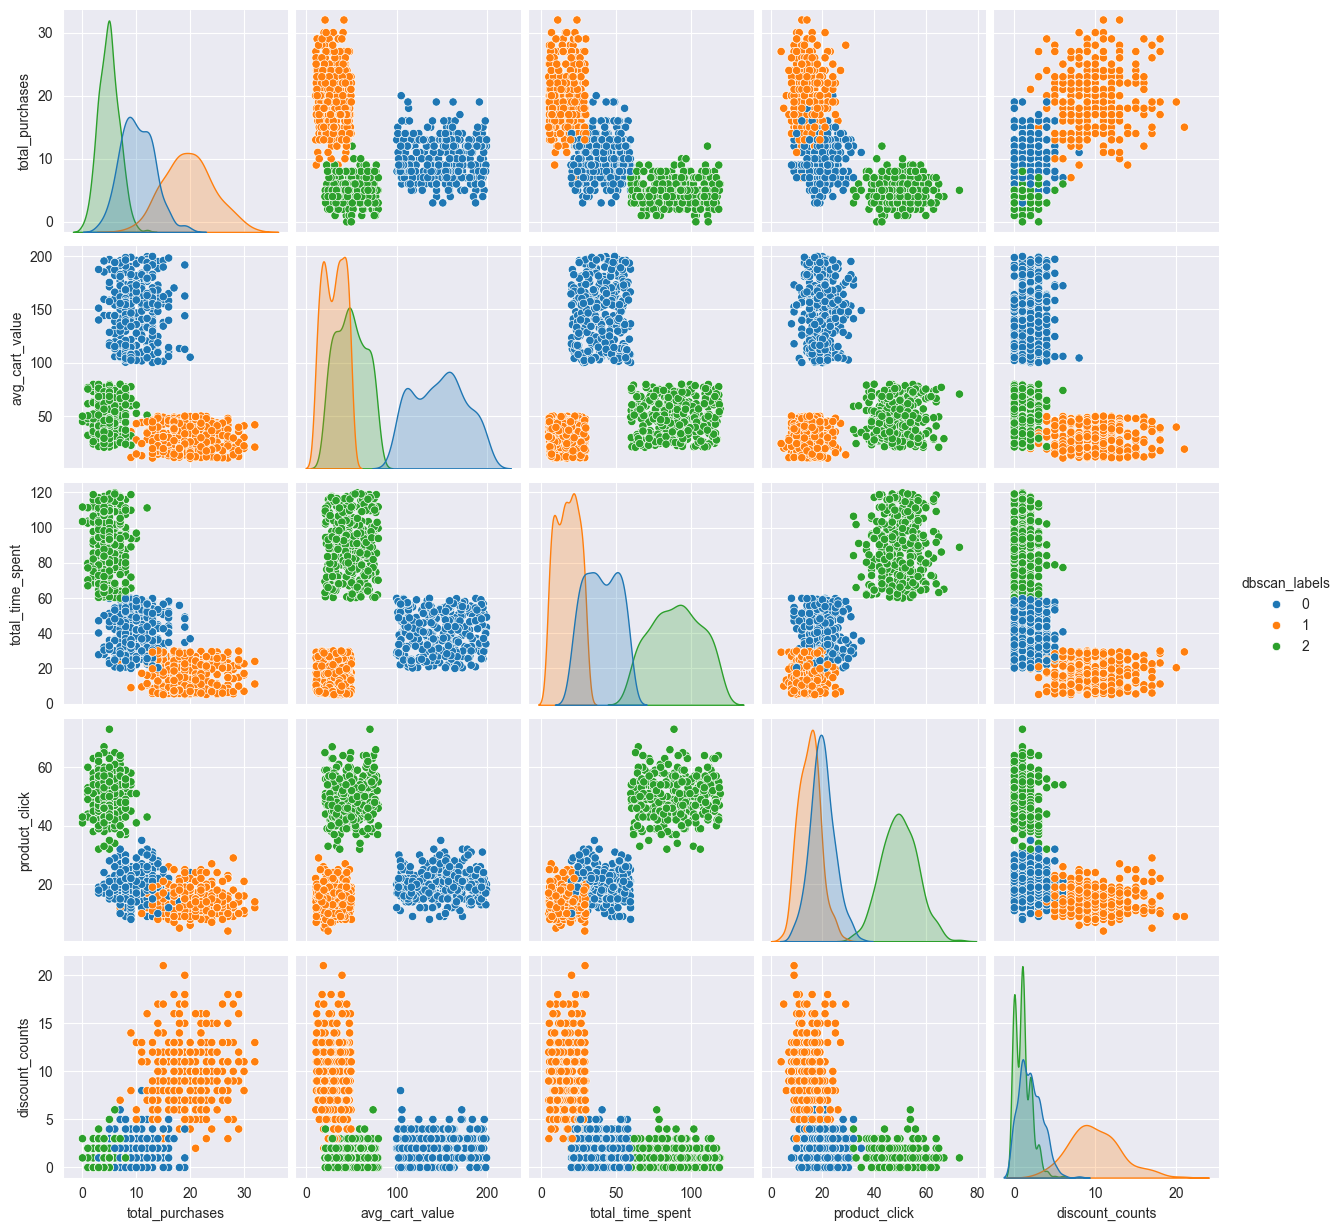

In [35]:
sns.pairplot(customer_data.loc[:, customer_data.columns != "kmeans_labels"],hue="dbscan_labels",palette="tab10")

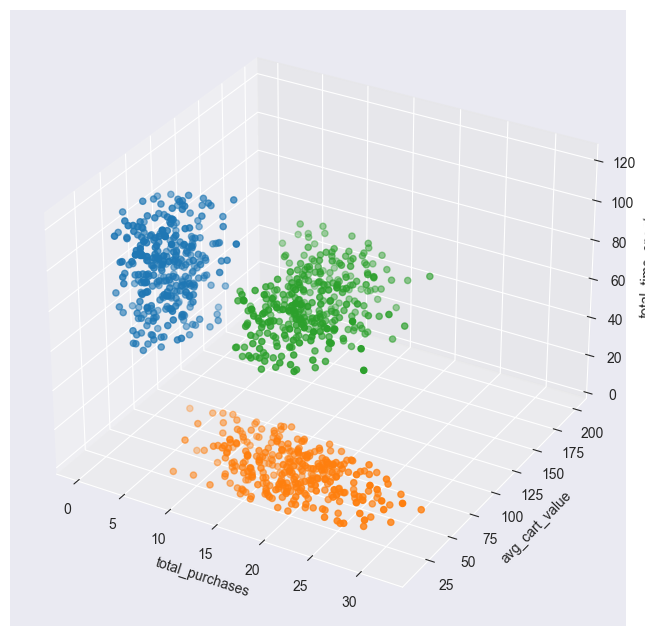

In [36]:
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
colors = sns.color_palette("tab10")

for label in range(3) :
    subset = customer_data_with_labels[customer_data_with_labels["kmeans_labels"]==label]  # Select points in this cluster
    ax.scatter(subset["total_purchases"],subset["avg_cart_value"], subset["total_time_spent"],color=colors[label], label=label)

ax.set_xlabel('total_purchases')
ax.set_ylabel('avg_cart_value')
ax.set_zlabel('total_time_spent')
plt.show()

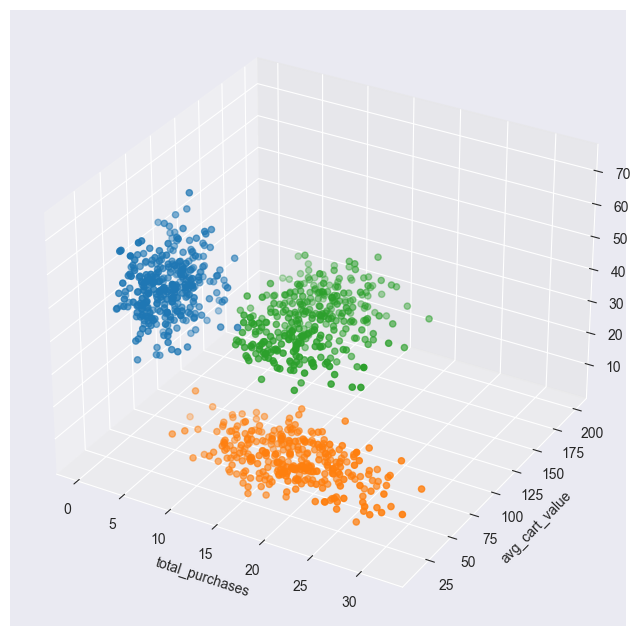

In [37]:
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
colors = sns.color_palette("tab10")

for label in range(3) :
    subset = customer_data_with_labels[customer_data_with_labels["kmeans_labels"]==label]  # Select points in this cluster
    ax.scatter(subset["total_purchases"],subset["avg_cart_value"], subset["product_click"],color=colors[label], label=label)

ax.set_xlabel('total_purchases')
ax.set_ylabel('avg_cart_value')
ax.set_zlabel('product_click')
plt.show()